# Assignment 1

Machine Learning (BBWL), Michael Mommert, FS2023, University of St. Gallen

The **goal** of this assignment is to implement a $k$-Nearest Neighbor (kNN) classifier that performs classification on the accompanied dataset. The dataset is 5-dimensional and consists of numerical features, only. Each datapoint belongs to either of three classes. Train a kNN classifier in such a way as to maximize its performance and to generalize well.

The general **objectives** are:
* to implement the ML pipeline using *scikit-learn* as discussed in the lecture and the lab course, following best practices;
* to properly perform hyperparameter tuning from which clearly follows which value of $k$ has been chosen and why;
* to compare the performance of the best trained model on the training, validation and test datasets, preventing both overfitting and underfitting.

This assignment will be **graded** based on:
* whether these objectives have been achieved;
* whether the solution follows best practices;
* how well the approach is documented (e.g., using text cells, plots, etc.);
* how clean the code is;
* the performance of the trained model.

There are no restrictions on the resources that you can use -- collaborating on assignments is allowed -- but students are not allowed to submit identical code.

-----

The following code cell will import the dataset used in this assignment. Please do not modify this code cell.

In [ ]:
import numpy as np
from urllib.request import urlopen
from io import BytesIO

# load data as binary npy file
raw_data = np.load(BytesIO(urlopen("X").read()))

x = raw_data[:,:5]  # this is your input data
y = raw_data[:, 5]  # this is your target vector

x.shape, y.shape

((2000, 5), (2000,))

## Ramdom seed

Set Random seed (ramdom_seed) for same results:

In [ ]:
random_seed = 9

# Imports

In [ ]:
# import numpy, sklearn, matplotlib, seaborn, pandas
import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

# 1. (Feature Engineering) & Dataset Exploration

The Dataset raw_data has 5 Features with 2000 values each (x -> input data). We turn raw_data into a DataFrame and create a pairplot. The diagonal of the pairplot shows a histogram of the distribtuion.

In [ ]:
#create a DataFrame
df = pd.DataFrame(raw_data, columns = ["Feature 1","Feature 2","Feature 3", "Feature 4","Feature 5","Target Value"])

#print shape of df and show df head
print(df.shape)
df.head()

(2000, 6)


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Target Value
0,-2.109198,-1.443881,-0.100620,-90.916762,-0.893275,2.0
1,-4.469359,-0.237587,-0.116520,3.983598,0.121665,1.0
2,5.754084,-0.459973,0.079301,-87.950730,-0.062872,2.0
3,-2.314240,1.162550,-0.015752,91.994132,0.973047,1.0
4,5.211160,-0.431351,0.063959,-85.552838,0.038414,2.0


Text(0.5, 0.98, 'Unscaled Pairplot')

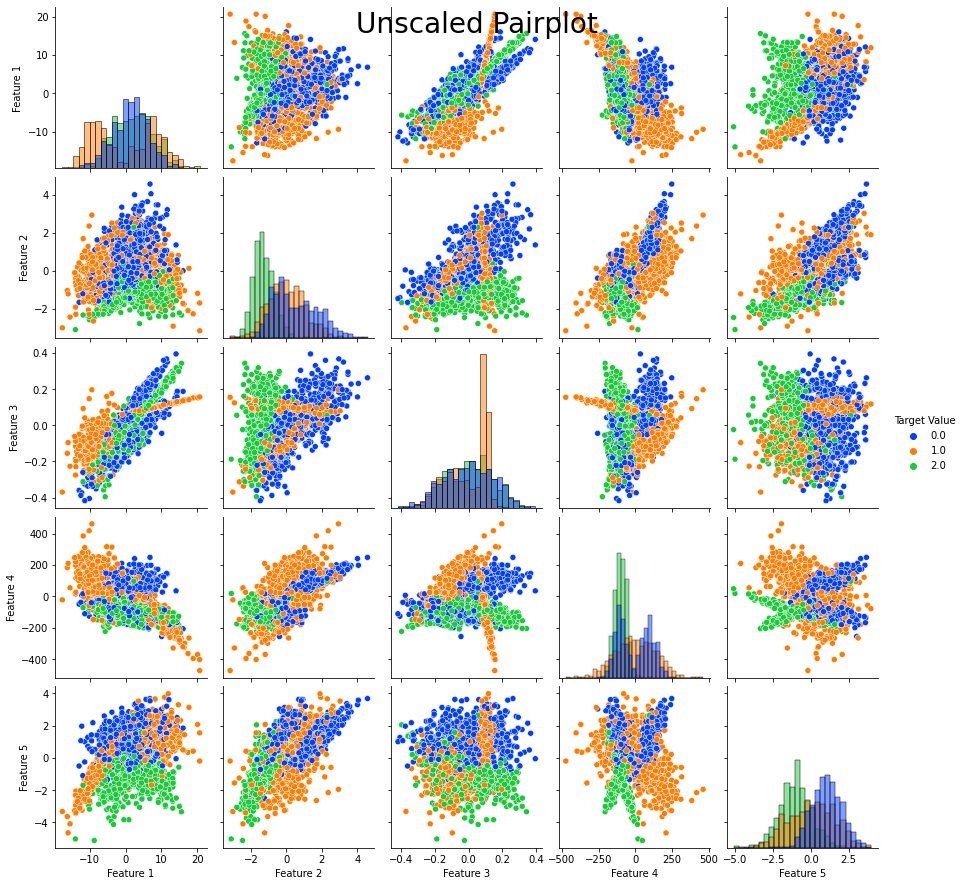

In [ ]:
#plot a pairplot of created df
unscaled_pairplot = sns.pairplot(df, diag_kind='hist',
             x_vars=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"],
             y_vars=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"],
             hue="Target Value", palette='bright')

#add title to plot
unscaled_pairplot.fig.suptitle("Unscaled Pairplot", x = 0.5, y = 0.98, size = 28)


# 2. Data scaling

If the dataset is not scaled features with large values can dominate and jeopardize the learning capability of a model. We scale the data with **StandardScaler()** so that all features have equal weight in the distance metric and we will get a better generalization performance.

In [ ]:
# import scaler
from sklearn.preprocessing import StandardScaler

# scale data with Standard Scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [ ]:
from scipy.sparse import data
#create a DataFrame for the scaled data
df_scaled = pd.DataFrame(data_scaled, columns = ["Feature 1","Feature 2","Feature 3", "Feature 4","Feature 5"])

#join the Column Target Value to the DataFrame
target_col = df["Target Value"]
df_scaled = df_scaled.join(target_col)

#to compare print the two DataFrames scaled and unscaled
print("Scaled data")
print(df_scaled)
print()
print("Unscaled data")
print(df)

Scaled data
      Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Target Value
0     -0.481830  -0.967132  -0.737722  -0.501855  -0.628980           2.0
1     -0.836627  -0.006069  -0.854090   0.325164   0.061589           1.0
2      0.700235  -0.183246   0.579099  -0.476007  -0.063970           2.0
3     -0.512654   1.109430  -0.116585   1.092141   0.640873           1.0
4      0.618619  -0.160443   0.466811  -0.455111   0.004945           2.0
...         ...        ...        ...        ...        ...           ...
1995  -1.735344  -0.923901  -1.391031   0.506251  -1.321393           1.0
1996   1.342843  -0.564202   1.310164  -0.864752  -0.609361           2.0
1997  -0.648597   0.167033  -1.515174  -0.332456   1.366955           0.0
1998  -0.543641  -1.140142  -0.731177  -0.511584  -0.895604           2.0
1999   0.180293   2.779745   1.103125   2.082701   1.621008           0.0

[2000 rows x 6 columns]

Unscaled data
      Feature 1  Feature 2  Feature 3   Feature 4  Feature 5

You can see that the DataFrame with the scaled data is different from the DataFrame with the unscaled datas. The next step is to check if the scaling is correct.

In [ ]:
# create dict with mean, std for the original and scaled data
scaledcomp = {"Original mean": np.mean(x, axis=0),
        "Scaled mean":np.mean(data_scaled, axis=0),
        "Original std": np.std(x, axis=0),
        "Scaled std": np.std(data_scaled, axis=0)}

# create df
scaledcomp_df = pd.DataFrame(scaledcomp)

# test if data is scaled correctly
print(scaledcomp_df.loc[:,["Original mean", "Scaled mean"]])
print()
print(scaledcomp_df.loc[:,["Original std", "Scaled std"]])

   Original mean   Scaled mean
0       1.096012  2.365053e-16
1      -0.229969  7.105427e-18
2       0.000177 -1.665335e-18
3     -33.328937  6.439294e-17
4       0.031146  1.909584e-17

   Original std  Scaled std
0      6.652153         1.0
1      1.255166         1.0
2      0.136633         1.0
3    114.749869         1.0
4      1.469715         1.0


The **standard deviation** of the scaled_data should equal 1 and the **mean** should be close to 0 (not 0 becuase of the numerical noise).

We can say that we have scaled the data correctly.


Text(0.5, 0.98, 'Scaled Pairplot')

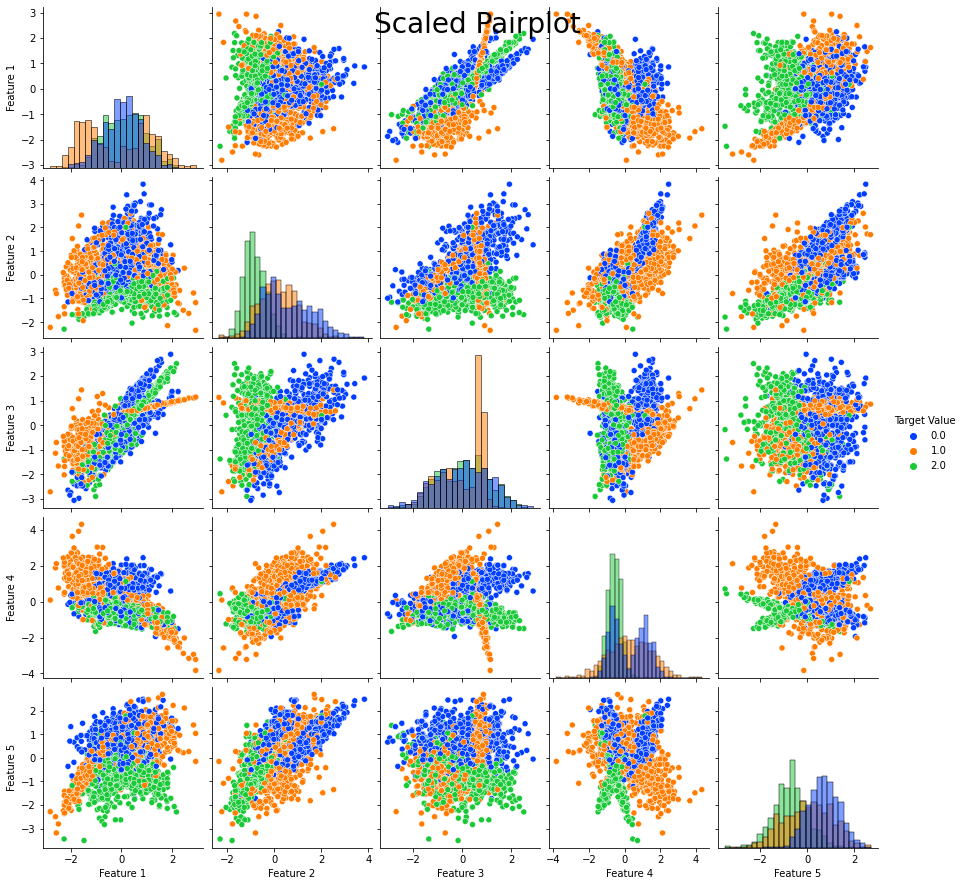

In [ ]:
#create a pairplot for the scaled DataFrame
scaled_pairplot = sns.pairplot(df_scaled, diag_kind='hist',
             x_vars=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"],
             y_vars=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"],
             hue="Target Value", palette='bright')

#add title to plot
scaled_pairplot.fig.suptitle("Scaled Pairplot", x = 0.5, y = 0.98, size = 28)

We can see from the axes of the pairplot that they have changed compared to the unscaled pairplot. So the data has been scaled. An influence on the shape of the distribution and the relationships between features is not visible to the eye but possible due to the scaling of the data.

# 3. Data splitting

Split the dataset into  a training dataset, a validation dataset and a test dataset. The validation and test dataset should never be shown to the model in the training process.

The code will split the data in:

*   70% training set
*   15% validation set
*   15% test set

To do that it is necessariy to make two splits. First split the whole dataset into 70% training set and 30% remainder set (test_size=1-train_fraction, we us 0.3 so we don't get a calculation error). Secondly split the 30% remainder into 15% validation and test set (test_size=0.5).





In [ ]:
#import train_test_split
from sklearn.model_selection import train_test_split

#set fraction of training to 70%
train_fraction = 0.7

# 70% training and 30% remainder
x_train, x_remainder, y_train, y_remainder = train_test_split(data_scaled, y, test_size= 0.3,
                                                              random_state=random_seed, stratify=y)
# split remainder in 50% validation and 50% test
x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5,
                                                random_state=random_seed, stratify=y_remainder)

The following print will show the shape of the different splits compared to the original dataset.

In [ ]:
print("Original Set:", raw_data.data.shape, x.shape)
print("Train Set:", x_train.shape, y_train.shape)
print("Validation Set:", x_val.shape, y_val.shape)
print("Test Set:", x_test.shape, y_test.shape)

Original Set: (2000, 6) (2000, 5)
Train Set: (1400, 5) (1400,)
Validation Set: (300, 5) (300,)
Test Set: (300, 5) (300,)


# 4. Define Hyperparameters
Define a Hyperparameter to start the model. k=1 is a simple nearest neighbor model.

In [ ]:
k = 1

# 5. Train model on training data for fixed hyperparameters

The following codes will train the model on our training dataset.

In [ ]:
# import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#assign hyperparameter k to knn
model = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# training the model on the training set
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# 6. Evaluate model on validation data

Evaluate the performance of the model with the split data. The accuracy is good but a small k can lead to overfitting. In the next step we should try to maximize the performance with different k's.


In [ ]:
#import accuracy score
from sklearn.metrics import accuracy_score

#accuracy score with k=1 on validation data
y_pred = model.predict(x_val)
acc_one = accuracy_score(y_pred, y_val)

#print accuracy
print(acc_one)

0.85


# 7. Tuning Hyperparameters
Maximize performance on validation data



In [ ]:
#print accuracy metric in % for k 1-30
for k in range(1,31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    print('k={:d}, val accuracy={:.2f}%'.format(k, accuracy_score(y_pred, y_val)*100))

k=1, val accuracy=85.00%
k=2, val accuracy=86.67%
k=3, val accuracy=87.67%
k=4, val accuracy=89.33%
k=5, val accuracy=88.67%
k=6, val accuracy=89.00%
k=7, val accuracy=88.00%
k=8, val accuracy=89.00%
k=9, val accuracy=89.00%
k=10, val accuracy=89.33%
k=11, val accuracy=88.33%
k=12, val accuracy=89.00%
k=13, val accuracy=87.67%
k=14, val accuracy=87.33%
k=15, val accuracy=86.33%
k=16, val accuracy=86.67%
k=17, val accuracy=86.67%
k=18, val accuracy=86.67%
k=19, val accuracy=86.67%
k=20, val accuracy=86.67%
k=21, val accuracy=86.33%
k=22, val accuracy=86.33%
k=23, val accuracy=86.00%
k=24, val accuracy=86.33%
k=25, val accuracy=86.67%
k=26, val accuracy=86.67%
k=27, val accuracy=87.33%
k=28, val accuracy=87.33%
k=29, val accuracy=87.33%
k=30, val accuracy=86.67%


k=10 and k=4 get both an accuracy of 89.33%. A smaller k can lead to ovrfitting the training data. So we should chose **k=10** to increase the chances that the model generalizes well. A k that is too high can lead to underfitting.

In [ ]:
#accuracy  metric for k=10
k=10
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
acc_two = accuracy_score(y_pred, y_val)

#print accuracy
print(round(acc_two,2))

0.89


# 8. Evaluate trained model on test data set
The final Test accuracy is smaller than the Validation accuracy. The model generalizes well and doesn't overfit.

In [ ]:
#chosen k
k = 10

#evaluate model on test data
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc_three = accuracy_score(y_pred, y_test)

#print accuracy metric for final test
print("Final test accuracy", acc_three*100,"%")

Final test accuracy 87.0 %


Text(0.5, 1.0, 'Confusion Matrix')

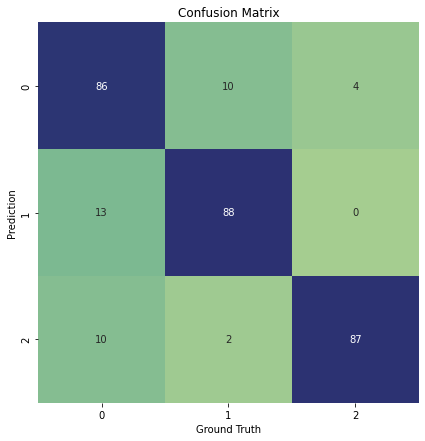

In [ ]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

#create confusion matrix
mat = confusion_matrix(y_test, y_pred)

# init the plot
plt.figure(figsize=(7, 7))

# plot confusion matrix heatmap
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='crest')

# add labels
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')

# add title
plt.title('Confusion Matrix')

**The Confusion Matrix** shows on the diagonal how often our model predicted correctly. The values next to the diagonal show how and how often we predicted incorrectly. It is noticeable that the model predicted 13 times a 1 that would actually be a 0.  It is also noticeable that the model predicted the 0 correctly the least often.

Minimum error:- 0.12 with K = 14


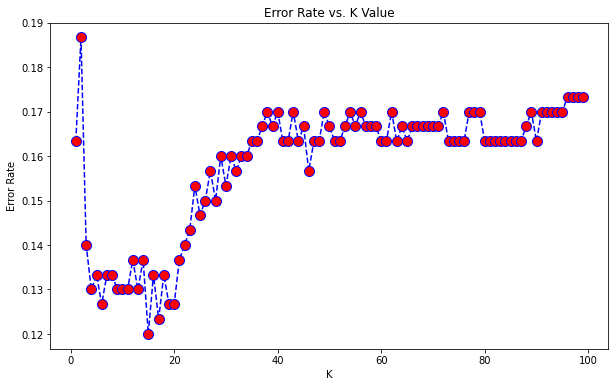

In [ ]:
error_rate = []
for k in range(1,100):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"with K =",error_rate.index(min(error_rate)))

In this plot we can see that the Error Rate is smallest for k = 14. However, when optimizing the model on the validation set, k=14 was less accurate than k=10.

# Summary
The final result shows that by increasing hyperparameter k, we were able to achieve higher accuracy. The lower accuracy on the test set compared to the validation set is good because it shows that the model has not memorized the structure and also performs well on an unseen data. The model generalizes well and is also fairly accurate at 87%.

In [ ]:
print("K=1 on validation set accuracy", round(acc_one*100,2),"%")
print("k=10 on validation set accuracy", round(acc_two*100,2),"%")
print("k=10 on test set accuracy", round(acc_three*100,2),"%")

K=1 on validation set accuracy 85.0 %
k=10 on validation set accuracy 89.33 %
k=10 on test set accuracy 87.0 %
